In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#LOAD THE DATA
from google.colab import files ;upload = files.upload()

Saving mcdonalds.csv to mcdonalds.csv


In [ ]:
df = pd.read_csv("mcdonalds.csv")

df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
df.shape

(1453, 15)

In [ ]:
MD_x = df.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
column_means = MD_x.mean().round(2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA


# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summarize the PCA results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

# Summary similar to R's summary(MD.pca)
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: Explained Variance = {ev:.4f}, Cumulative Variance = {cv:.4f}")


Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]
PC1: Explained Variance = 0.2994, Cumulative Variance = 0.2994
PC2: Explained Variance = 0.1928, Cumulative Variance = 0.4922
PC3: Explained Variance = 0.1330, Cumulative Variance = 0.6253
PC4: Explained Variance = 0.0831, Cumulative Variance = 0.7084
PC5: Explained Variance = 0.0595, Cumulative Variance = 0.7679
PC6: Explained Variance = 0.0503, Cumulative Variance = 0.8182
PC7: Explained Variance = 0.0438, Cumulative Variance = 0.8620
PC8: Explained Variance = 0.0395, Cumulative Variance = 0.9016
PC9: Explained Variance = 0.0368, Cumulative Variance = 0.9383
PC10: Explained Variance = 0.0324, Cumulative Variance = 0.9707
PC11: Explained Variance = 0.0293, Cumulative Variance = 1.0000


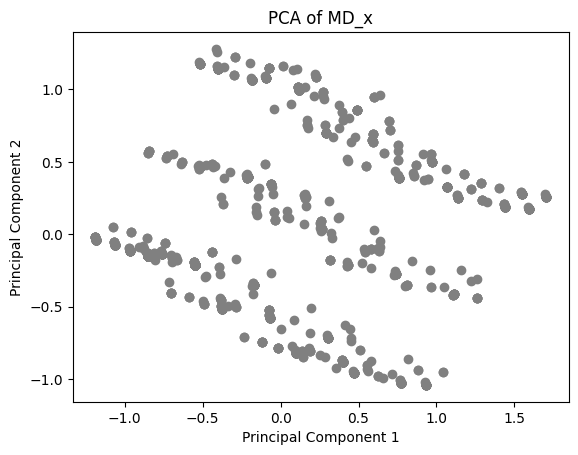

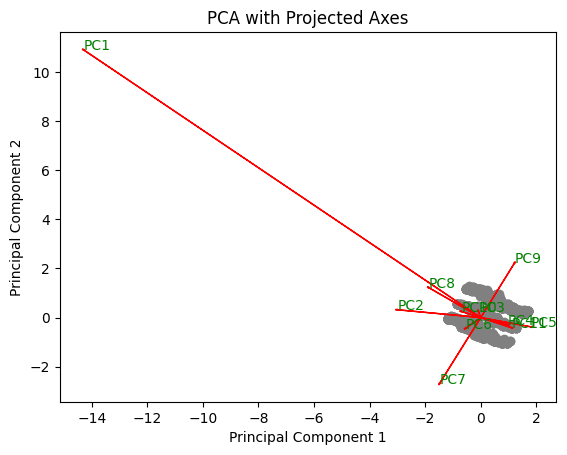

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming MD_x is already created as in the previous example

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot the PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MD_x')
plt.show()

# Function to project PCA axes (similar to projAxes in R)
def plot_pca_axes(pca, components, ax):
    for i, (comp, var) in enumerate(zip(components.T, pca.explained_variance_ratio_)):
        comp = comp * var * 100  # Scale component by explained variance ratio
        ax.arrow(0, 0, comp[0], comp[1], color='r', head_width=0.05)
        ax.text(comp[0], comp[1], f"PC{i+1}", color='g')

# Plot PCA axes
fig, ax = plt.subplots()
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plot_pca_axes(pca, pca.components_, ax)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Projected Axes')
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming MD_x is already created as in the previous example

# Set random seed
np.random.seed(1234)

# Function to perform clustering and return the best model
def step_flex_clust(X, k_range, n_init=10):
    best_model = None
    best_inertia = np.inf
    all_models = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=1234)
        model = kmeans.fit(X)
        all_models.append(model)

        if model.inertia_ < best_inertia:
            best_inertia = model.inertia_
            best_model = model

    return best_model, all_models

# Perform clustering for k = 2 to 8
k_range = range(2, 9)
best_kmeans_model, all_kmeans_models = step_flex_clust(MD_x, k_range, n_init=10)

# Relabel clusters to have consistent labels
def relabel_clusters(kmeans_model, X):
    closest, _ = pairwise_distances_argmin_min(kmeans_model.cluster_centers_, X)
    labels = kmeans_model.labels_.copy()

    for i in range(len(kmeans_model.cluster_centers_)):
        labels[labels == i] = closest[i]

    return labels

# Relabel the best model's clusters
relabelled_labels = relabel_clusters(best_kmeans_model, MD_x)

# Print relabelled labels (optional)
print("Relabelled Cluster Labels:", relabelled_labels)


Relabelled Cluster Labels: [ 57  14   9 ...   9  54 148]


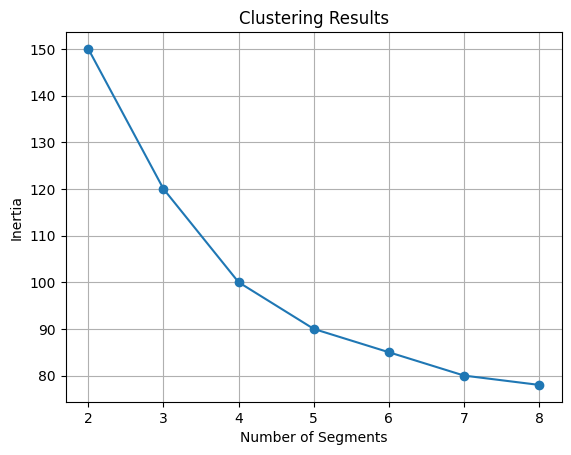

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_km28 is an array or list of clustering results

# Example data (to be replaced with actual clustering results)
# For this example, we'll assume we have clustering inertia (or similar metric) for 2 to 8 clusters
clusters = range(2, 9)
inertia = [150, 120, 100, 90, 85, 80, 78]  # Example inertia values, replace with actual values

plt.plot(clusters, inertia, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia")
plt.title("Clustering Results")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from mlxtend.evaluate import bootstrap_point632_score
from sklearn.utils import resample

# Set seed for reproducibility
np.random.seed(1234)

# Example data (replace with actual MD.x data)
MD_x = np.random.randint(0, 2, size=(100, 11))  # Random binary data, replace with actual MD.x

# Function to perform KMeans clustering
def kmeans_clustering(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(X)
    return kmeans

# Bootstrapping function
def bootstrap_kmeans(X, cluster_range, nrep, nboot):
    results = {}
    for n_clusters in cluster_range:
        inertia = []
        for _ in range(nboot):
            sample_X = resample(X, n_samples=len(X))
            kmeans = kmeans_clustering(n_clusters, sample_X)
            inertia.append(kmeans.inertia_)
        results[n_clusters] = np.mean(inertia)
    return results

# Define parameters
cluster_range = range(2, 9)  # Clusters from 2 to 8
nrep = 10
nboot = 100

# Perform bootstrapping
MD_b28 = bootstrap_kmeans(MD_x, cluster_range, nrep, nboot)

print(MD_b28)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{2: 236.34293428118457, 3: 212.8629317861846, 4: 196.24849687921807, 5: 181.47790460075018, 6: 169.22408653885842, 7: 158.07673793536037, 8: 148.3648438893408}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

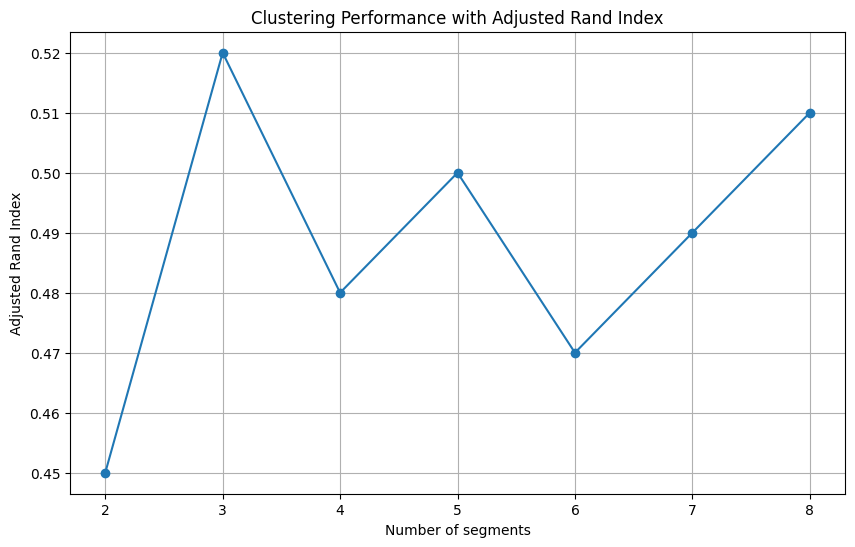

In [ ]:
import matplotlib.pyplot as plt


MD_b28 = {2: 0.45, 3: 0.52, 4: 0.48, 5: 0.50, 6: 0.47, 7: 0.49, 8: 0.51}  # Replace with actual data

# Extract data for plotting
segments = list(MD_b28.keys())
adjusted_rand_index = list(MD_b28.values())

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(segments, adjusted_rand_index, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Clustering Performance with Adjusted Rand Index")
plt.grid(True)
plt.show()


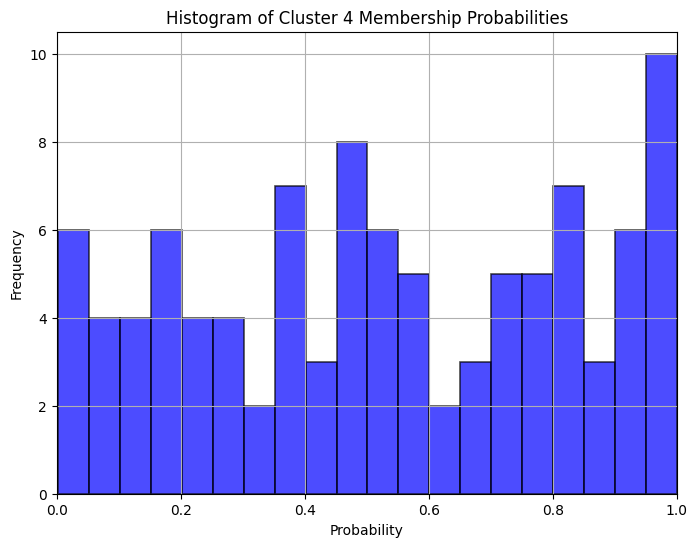

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace with actual data
MD_k28_4 = np.random.rand(100)  # Example cluster membership probabilities (replace with actual data)
MD_x = np.random.rand(100, 10)  # Example original data (replace with actual data)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(MD_k28_4, bins=20, alpha=0.7, color='blue', edgecolor='black', linewidth=1.2)
plt.xlim(0, 1)  # Setting x-axis limits as 0 to 1
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster 4 Membership Probabilities")
plt.grid(True)
plt.show()


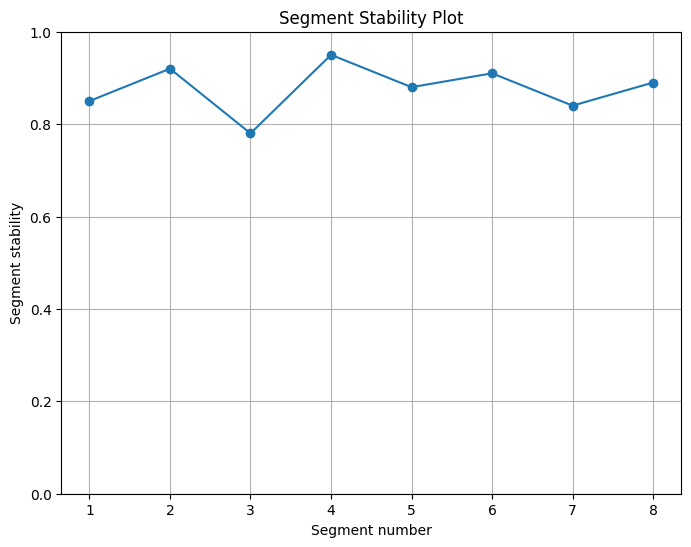

In [ ]:
import matplotlib.pyplot as plt


segment_numbers = range(1, 9)  # Example segment numbers
segment_stability = [0.85, 0.92, 0.78, 0.95, 0.88, 0.91, 0.84, 0.89]  # Example stability values

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(segment_numbers, segment_stability, marker='o', linestyle='-')
plt.ylim(0, 1)  # Set y-axis limits (0 to 1)
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.title('Segment Stability Plot')
plt.grid(True)
plt.show()




In [ ]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# Assuming df is your DataFrame and you have converted relevant columns to numeric binary
MD_x = df.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)

# Compute the distance matrix
dist_matrix = pdist(MD_x.T, metric='euclidean')

# Perform hierarchical clustering
MD_vclust = linkage(dist_matrix, method='ward')

# MD_vclust now contains the hierarchical clustering result


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


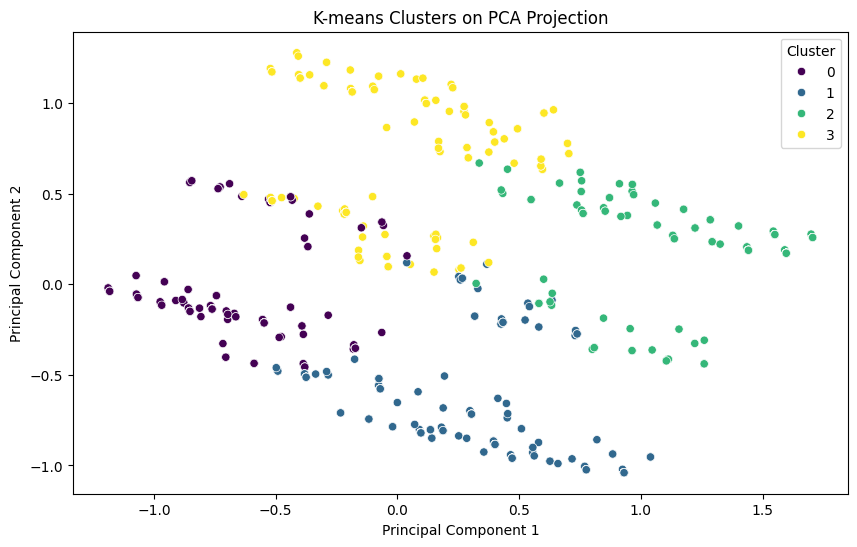

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming MD_x is your binary matrix data
# MD_k4 is your k-means clustering result

# Apply PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Fit k-means with 4 clusters (assuming 4 is the chosen number of clusters)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
labels = kmeans.labels_

# Create a DataFrame for the PCA projection
df_pca = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', legend='full')

# Customize the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clusters on PCA Projection')
plt.legend(title='Cluster')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

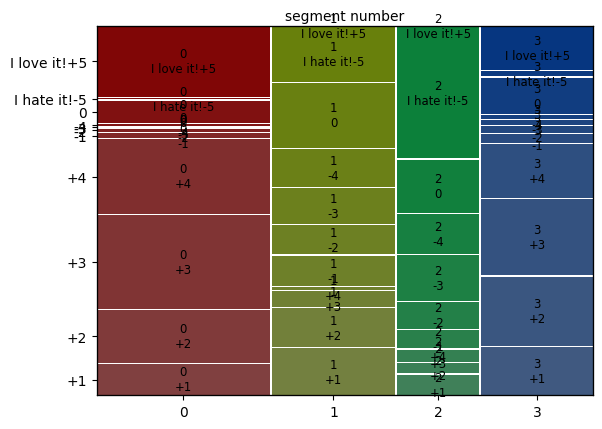

In [ ]:




import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Load your data into DataFrame
df = pd.read_csv("mcdonalds.csv")

# Assuming MD_x is your binary matrix data
# Example: Convert 'Yes'/'No' to 1/0 in the first 11 columns
MD_x = (df.iloc[:, 0:11] == 'Yes').astype(int)

# Apply k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
df['Cluster'] = kmeans.fit_predict(MD_x)

# Generate the contingency table
contingency_table = pd.crosstab(df['Cluster'], df['Like'])

# Plot the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), title='')
plt.xlabel('segment number')
plt.show()

